# Prevendo o Nível de Satisfação dos Clientes do Santander
### Projeto nº3 da Formação Cientista de Dados da Data Science Academy
O objetivo é prever a satisfação do cliente com base nos dados fornecidos e a acurácia do modelo deve ser de, pelo menos, 70%.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Análise Exploratória de Dados

In [2]:
df = pd.read_csv('./data/train.csv')
df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [3]:
df.set_index('ID', inplace=True)
df

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0


In [4]:
df.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
# Verificando quantos valores únicos há em cada coluna do dataset
n_unicos = pd.DataFrame(columns=['N_unicos'])
for col in df.columns:
    n_unicos.loc[col] = len(df[col].unique())

In [6]:
# Extraindo o número de valores únicos existente em cada variável do dataset.
n_unicos

,N_unicos
var3,208
var15,100
imp_ent_var16_ult1,596
imp_op_var39_comer_ult1,7551
imp_op_var39_comer_ult3,9099
...,...
saldo_medio_var44_hace3,33
saldo_medio_var44_ult1,141
saldo_medio_var44_ult3,141
var38,57736


In [7]:
agrup = n_unicos.reset_index()
agrup.groupby('N_unicos', as_index=True).count().head(20)

,index
N_unicos,
1,34
2,106
3,31
4,20
5,14
6,7
7,9
8,4
9,13


### Feature selection

Da tabela acima depreende-se que existem 34 variáveis com 1 valor único possível, isto é, que não apresentam variação e podem, portanto, serem excluídas da análise.
106 variáveis apresentam valor 2 valores únicos (variáveis binárias), 31 variáveis apresentam 3 valores únicos possíveis, etc.

In [8]:
# Variáveis que não apresentam variação:
n_unicos[n_unicos['N_unicos']==1]

,N_unicos
ind_var2_0,1
ind_var2,1
ind_var27_0,1
ind_var28_0,1
ind_var28,1
ind_var27,1
ind_var41,1
ind_var46_0,1
ind_var46,1
num_var27_0,1


In [9]:
excluir = n_unicos[n_unicos['N_unicos']==1].index
excluir

Index(['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0',
       'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0',
       'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46',
       'imp_amort_var18_hace3', 'imp_amort_var34_hace3',
       'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3',
       'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3',
       'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3',
       'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3',
       'num_trasp_var33_out_hace3', 'saldo_var2_ult1',
       'saldo_medio_var13_medio_hace3'],
      dtype='object')

In [10]:
df[excluir]

,ind_var2_0,ind_var2,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var41,ind_var46_0,ind_var46,num_var27_0,...,imp_trasp_var17_out_hace3,imp_trasp_var33_out_hace3,num_var2_0_ult1,num_var2_ult1,num_reemb_var13_hace3,num_reemb_var33_hace3,num_trasp_var17_out_hace3,num_trasp_var33_out_hace3,saldo_var2_ult1,saldo_medio_var13_medio_hace3
ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Excluindo do dataset as variáveis que não apresentam variação
df.drop(excluir, axis=1, inplace=True)
df

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0


In [12]:
# Verificando e excluindo possíveis valores missing do dataframe
df.dropna(inplace=True)
df

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0


Como não foi excluída nenhuma linha do dataset, podemos concluir que não há valores missing a serem tratados.

Em um problema de classificação, é necessário avaliar se o dataset é balanceado em relação à variável target. Isto é, se fornece um número de observações de mesma ordem de grandeza das classes que se deseja prever, para que o modelo não fique viesado.

In [13]:
df.groupby('TARGET', as_index=True).count()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
TARGET,,,,,,,,,,,,,,,,,,,,,
0,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,...,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012
1,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,...,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008


Como pode-se observar da célula acima, o dataset é desbalanceado numa relação de 24:1. Para contornar este problema optou-se por utilizar a técnica SMOTE (Synthetic Minority Over-sampling Technique).

In [14]:
#%pip install imbalanced-learn

In [15]:
#import imblearn
#print(imblearn.__version__)

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
oversampling = SMOTE()

In [18]:
df.drop('TARGET', axis=1)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000
151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000
151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000


In [19]:
X, y = oversampling.fit_resample(df.drop('TARGET', axis=1), df['TARGET'])

In [20]:
# summarize the new class distribution
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 73012, 1: 73012})


In [21]:
#y = pd.DataFrame(y)
df_balanceado = pd.concat([X, y], axis=1)
df_balanceado

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.000000,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146019,2,30,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107663.774685,1
146020,2,28,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,215948.052503,1
146021,2,51,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,1
146022,2,82,377.786428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41354.146637,1


In [22]:
df_balanceado.groupby('TARGET', as_index=True).count()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
TARGET,,,,,,,,,,,,,,,,,,,,,
0,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,...,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012
1,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012,...,73012,73012,73012,73012,73012,73012,73012,73012,73012,73012


In [23]:
df_balanceado.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000,...,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000,1.460240e+05,146024.000000
mean,-997.860297,36.027359,77.397728,71.465903,111.596988,3.326496,5.220532,1.335153,1.645478,3.103185,...,4.131385,0.710694,6.359423,4.572983,16.401652,0.967573,45.335433,35.229655,1.087855e+05,0.500000
std,30780.042424,12.075334,1365.279851,341.528500,499.341512,80.140154,120.944009,38.810294,47.179302,79.630528,...,328.957204,82.227377,565.135445,388.521294,1452.602425,106.635527,2935.908539,2087.306839,1.472517e+05,0.500002
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.230282e+04,0.000000
50%,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.649799e+04,0.500000
75%,2.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.173110e+05,1.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


Próximos passos:
- Análise de outliers
- Correlação com a variável target
- Redução de dimensionalidade

Em um primeiro momento, opta-se por não fazer análise de outliers para evitar perda de dados. Voltar-se-á a este ponto como tentativa de melhoria de acurácia caso não seja atingida.

In [24]:
corr = df_balanceado.corr()

In [25]:
corr

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
var3,1.000000,0.000725,0.001495,0.005265,0.006014,0.001370,0.001442,0.001119,0.001135,0.001280,...,0.000441,0.000302,0.000392,0.000411,0.000372,0.000310,0.000504,0.000551,-0.001810,0.018219
var15,0.000725,1.000000,0.037708,0.063139,0.069147,0.037907,0.039296,0.027921,0.024385,0.033012,...,0.019800,0.011350,0.019443,0.019843,0.019958,0.012504,0.026852,0.029044,-0.010619,0.255145
imp_ent_var16_ult1,0.001495,0.037708,1.000000,0.054141,0.051476,0.011976,0.014846,0.006085,0.012177,0.018738,...,-0.000657,-0.000484,-0.000395,-0.000385,0.002339,-0.000464,0.008867,0.011961,0.013564,-0.006457
imp_op_var39_comer_ult1,0.005265,0.063139,0.054141,1.000000,0.913254,0.331704,0.289495,0.114196,0.130680,0.241846,...,0.011804,0.008423,0.009040,0.009853,0.006800,0.003990,0.010183,0.010267,0.007501,-0.000539
imp_op_var39_comer_ult3,0.006014,0.069147,0.051476,0.913254,1.000000,0.308397,0.337233,0.093438,0.115215,0.250707,...,0.021896,0.017359,0.014723,0.016391,0.006919,0.005164,0.009673,0.009422,0.010683,-0.015105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,0.000310,0.012504,-0.000464,0.003990,0.005164,-0.000377,-0.000392,-0.000312,-0.000316,-0.000354,...,-0.000114,-0.000078,-0.000102,-0.000107,0.332235,1.000000,0.227628,0.210304,0.003784,-0.009074
saldo_medio_var44_ult1,0.000504,0.026852,0.008867,0.010183,0.009673,-0.000254,-0.000410,-0.000531,-0.000539,-0.000290,...,0.000945,-0.000133,0.002593,0.002313,0.812598,0.227628,1.000000,0.967657,0.005930,-0.011321
saldo_medio_var44_ult3,0.000551,0.029044,0.011961,0.010267,0.009422,-0.000381,-0.000517,-0.000581,-0.000589,-0.000400,...,0.001092,-0.000146,0.002979,0.002658,0.700759,0.210304,0.967657,1.000000,0.006670,-0.011081
var38,-0.001810,-0.010619,0.013564,0.007501,0.010683,0.012817,0.013519,-0.001989,-0.000801,0.002447,...,0.004702,0.001932,0.004454,0.004515,0.003234,0.003784,0.005930,0.006670,1.000000,-0.062299


In [26]:
corr['TARGET']

var3                       0.018219
var15                      0.255145
imp_ent_var16_ult1        -0.006457
imp_op_var39_comer_ult1   -0.000539
imp_op_var39_comer_ult3   -0.015105
                             ...   
saldo_medio_var44_hace3   -0.009074
saldo_medio_var44_ult1    -0.011321
saldo_medio_var44_ult3    -0.011081
var38                     -0.062299
TARGET                     1.000000
Name: TARGET, Length: 336, dtype: float64

In [27]:
faixa_corr = corr['TARGET'].sort_values()
faixa_corr

ind_var30                 -0.496100
ind_var5                  -0.493305
num_meses_var5_ult3       -0.464901
num_var30                 -0.422041
num_var5                  -0.413232
                             ...   
imp_op_var39_efect_ult1    0.051671
num_var8_0                 0.055581
var15                      0.255145
var36                      0.298630
TARGET                     1.000000
Name: TARGET, Length: 336, dtype: float64

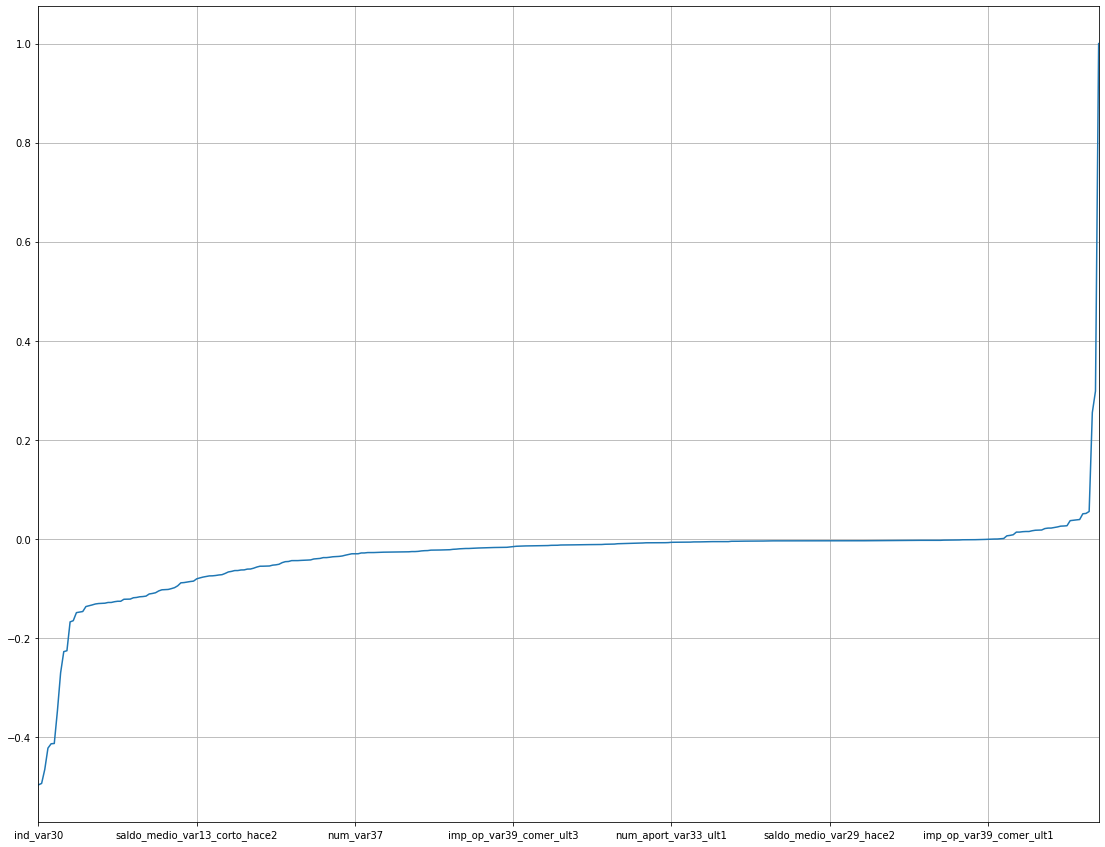

In [28]:
faixa_corr.plot(figsize=(19, 15), grid=True)

Visualmente pode-se verificar que existe uma grande quantidade de variáveis com uma correlação muito fraca com a variável TARGET. Arbitrariamente, serão excluídas as variáveis cujo valor absoluto de correlação sejam menores ou iguais a 0,05. Dependendo da acurácia atingida, este valor pode ser modificado para incluir mais informação na entrada do modelo de machine learning.

In [29]:
faixa_corr[abs(faixa_corr.values) > 0.05]

ind_var30                 -0.496100
ind_var5                  -0.493305
num_meses_var5_ult3       -0.464901
num_var30                 -0.422041
num_var5                  -0.413232
                             ...   
imp_op_var39_efect_ult1    0.051671
num_var8_0                 0.055581
var15                      0.255145
var36                      0.298630
TARGET                     1.000000
Name: TARGET, Length: 83, dtype: float64

In [30]:
filtro1 = faixa_corr[abs(faixa_corr.values) > 0.05].index
filtro1

Index(['ind_var30', 'ind_var5', 'num_meses_var5_ult3', 'num_var30', 'num_var5',
       'num_var42', 'num_var4', 'num_var35', 'ind_var39_0', 'ind_var41_0',
       'ind_var43_recib_ult1', 'ind_var12_0', 'num_var39_0', 'num_var41_0',
       'num_meses_var39_vig_ult3', 'ind_var13_0', 'ind_var13', 'ind_var37_cte',
       'ind_var12', 'num_var13_0', 'num_var13', 'saldo_var30', 'ind_var37_0',
       'ind_var37', 'ind_var43_emit_ult1', 'ind_var5_0', 'ind_var24_0',
       'num_meses_var13_corto_ult3', 'num_meses_var12_ult3', 'num_var12',
       'ind_var13_corto_0', 'ind_var24', 'ind_var13_corto',
       'num_var13_corto_0', 'num_var13_corto', 'num_var24', 'num_var24_0',
       'ind_var9_cte_ult1', 'ind_var10cte_ult1', 'ind_var14_0', 'saldo_var13',
       'ind_var9_ult1', 'num_var30_0', 'ind_var10_ult1',
       'num_aport_var13_hace3', 'saldo_var13_corto',
       'saldo_medio_var13_corto_ult1', 'saldo_var42',
       'saldo_medio_var13_corto_ult3', 'num_var5_0',
       'saldo_medio_var13_corto_ha

In [31]:
df_filt1 = df_balanceado[filtro1]
df_filt1

,ind_var30,ind_var5,num_meses_var5_ult3,num_var30,num_var5,num_var42,num_var4,num_var35,ind_var39_0,ind_var41_0,...,num_var22_hace3,saldo_var5,saldo_var13_largo,saldo_medio_var13_corto_hace3,imp_op_var41_efect_ult1,imp_op_var39_efect_ult1,num_var8_0,var15,var36,TARGET
0,0,0,0,0,0,0,0,0,1,1,...,0,0.000000,0.0,0.00,0.000000,0.000000,0,23,99,0
1,1,0,1,3,0,0,1,3,1,1,...,0,0.000000,0.0,122.22,0.000000,0.000000,0,34,3,0
2,1,1,3,3,3,3,1,3,1,1,...,0,3.000000,0.0,0.00,0.000000,0.000000,0,23,99,0
3,1,1,2,3,3,3,3,9,1,1,...,0,70.620000,0.0,0.00,0.000000,0.000000,0,37,2,0
4,1,0,3,3,0,3,1,3,1,1,...,0,0.000000,0.0,0.00,0.000000,0.000000,0,39,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146019,0,0,0,0,0,0,0,0,0,0,...,0,0.000000,0.0,0.00,0.000000,0.000000,0,30,99,1
146020,0,0,2,2,2,2,1,5,1,1,...,8,249.703485,0.0,0.00,55.489663,55.489663,0,28,10,1
146021,0,0,0,0,0,0,0,0,1,1,...,0,0.000000,0.0,0.00,0.000000,0.000000,0,51,99,1
146022,1,1,2,3,3,3,1,3,1,1,...,0,878.625793,0.0,0.00,0.000000,0.000000,0,82,1,1


### Divisão do dataset em datasets de treino e teste

Feita a primeira seleção de variáveis, será feita a divisão do dataset resultante em datasets de treino e teste. A depender do não-atingimento da acurácia necessária, pode se fazer necessário a inclusão de mais atributos (variáveis) para treinamento do modelo. Por outro lado, a depender do desempenho requerido para treinamento dos algoritmos de machine learning, pode ser necessária alguma técnica de redução da dimensionalidade.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df_filt1.iloc[:,:-1]
Y = df_filt1.iloc[:, -1]

In [35]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.3)
print(f'Dimensão de X_treino: {X_treino.shape}')
print(f'Dimensão de Y_treino: {Y_treino.shape}')
print(f'Dimensão de X_teste: {X_teste.shape}')
print(f'Dimensão de Y_teste: {Y_teste.shape}')

Dimensão de X_treino: (102216, 82)
Dimensão de Y_treino: (102216,)
Dimensão de X_teste: (43808, 82)
Dimensão de Y_teste: (43808,)


### Modelos de Machine Learning
Serão testados vários modelos para comparação quanto ao resultado esperado de acurácia.

#### Regressão logística

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
%%time

# Criação do modelo
mod1_LogReg = LogisticRegression()

# Treinamento do modelo
mod1_LogReg.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste
mod1_result = mod1_LogReg.score(X_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (mod1_result * 100.0))

# Matriz de confusão
Y_pred = mod1_LogReg.predict(X_teste)
matrix = confusion_matrix(Y_teste, Y_pred)
print("\nMatriz de confusão:")
print(matrix)
print("\n")

# Relatório de Classificação
report = classification_report(Y_teste, Y_pred)
print(report)

C:\Users\rafae\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Acurácia nos Dados de Teste: 52.390%

Matriz de confusão:
[[20693  1098]
 [19759  2258]]


              precision    recall  f1-score   support

           0       0.51      0.95      0.66     21791
           1       0.67      0.10      0.18     22017

    accuracy                           0.52     43808
   macro avg       0.59      0.53      0.42     43808
weighted avg       0.59      0.52      0.42     43808

Wall time: 3.25 s


#### KNN - K-Nearest Neighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
%%time

# Criação do modelo
mod2_knn = KNeighborsClassifier()

# Treinamento do modelo
mod2_knn.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste
mod2_result = mod2_knn.score(X_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (mod2_result * 100.0))

# Matriz de confusão
Y_pred = mod2_knn.predict(X_teste)
matrix = confusion_matrix(Y_teste, Y_pred)
print("\nMatriz de confusão:")
print(matrix)
print("\n")

# Relatório de Classificação
report = classification_report(Y_teste, Y_pred)
print(report)

Acurácia nos Dados de Teste: 83.829%

Matriz de confusão:
[[16951  4840]
 [ 2244 19773]]


              precision    recall  f1-score   support

           0       0.88      0.78      0.83     21791
           1       0.80      0.90      0.85     22017

    accuracy                           0.84     43808
   macro avg       0.84      0.84      0.84     43808
weighted avg       0.84      0.84      0.84     43808

Wall time: 4min 59s


#### Naive-Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
%%time

# Criação do modelo
mod3_naiveBayes = GaussianNB()

# Treinamento do modelo
mod3_naiveBayes.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste
mod3_result = mod3_naiveBayes.score(X_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (mod3_result * 100.0))

# Matriz de confusão
Y_pred = mod3_naiveBayes.predict(X_teste)
matrix = confusion_matrix(Y_teste, Y_pred)
print("\nMatriz de confusão:")
print(matrix)
print("\n")

# Relatório de Classificação
report = classification_report(Y_teste, Y_pred)
print(report)

Acurácia nos Dados de Teste: 53.691%

Matriz de confusão:
[[ 1830 19961]
 [  326 21691]]


              precision    recall  f1-score   support

           0       0.85      0.08      0.15     21791
           1       0.52      0.99      0.68     22017

    accuracy                           0.54     43808
   macro avg       0.68      0.53      0.42     43808
weighted avg       0.68      0.54      0.42     43808

Wall time: 990 ms


#### Árvore de Decisão

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
%%time

# Criação do modelo
mod4_DecisionTree = DecisionTreeClassifier()

# Treinamento do modelo
mod4_DecisionTree.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste
mod4_result = mod4_DecisionTree.score(X_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (mod4_result * 100.0))

# Matriz de confusão
Y_pred = mod4_DecisionTree.predict(X_teste)
matrix = confusion_matrix(Y_teste, Y_pred)
print("\nMatriz de confusão:")
print(matrix)
print("\n")

# Relatório de Classificação
report = classification_report(Y_teste, Y_pred)
print(report)

Acurácia nos Dados de Teste: 93.024%

Matriz de confusão:
[[19937  1854]
 [ 1202 20815]]


              precision    recall  f1-score   support

           0       0.94      0.91      0.93     21791
           1       0.92      0.95      0.93     22017

    accuracy                           0.93     43808
   macro avg       0.93      0.93      0.93     43808
weighted avg       0.93      0.93      0.93     43808

Wall time: 2.86 s


#### Support Vector Machine (SVM)

In [47]:
from sklearn.svm import SVC

In [48]:
%%time

# Criação do modelo
mod5_svm = SVC()

# Treinamento do modelo
mod5_svm.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste
mod5_result = mod5_svm.score(X_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (mod5_result * 100.0))

# Matriz de confusão
Y_pred = mod5_svm.predict(X_teste)
matrix = confusion_matrix(Y_teste, Y_pred)
print("\nMatriz de confusão:")
print(matrix)
print("\n")

# Relatório de Classificação
report = classification_report(Y_teste, Y_pred)
print(report)

Acurácia nos Dados de Teste: 58.471%

Matriz de confusão:
[[ 7040 14751]
 [ 3442 18575]]


              precision    recall  f1-score   support

           0       0.67      0.32      0.44     21791
           1       0.56      0.84      0.67     22017

    accuracy                           0.58     43808
   macro avg       0.61      0.58      0.55     43808
weighted avg       0.61      0.58      0.55     43808

Wall time: 59min 34s


#### Melhor modelo de machine learning para o problema

Dos resultados obtidos com testes de 5 algoritmos de machine learning para classificação (Regressão Logística, KNN, Naive-Bayes, Árvore de Decisão e SVM), o melhor resultado em termos de acurácia foi dado pelo modelo de Árvore de Decisão, apresentando acurácia de 93.024%, superando a especificação demandada de 70%. Este modelo foi também o que teve melhor resultado em termos de precisão e *recall* para ambas as categorias da variável TARGET, apresentando todas estas métricas acima de 90%. Na prática, isto significa que o modelo acerta aproximadamente 9 em cada 10 vezes tanto se a previsão for para cliente satisfeito como para cliente insatisfeito. Isto pode se refletir em uma redução de custos para o banco em relação a um modelo como o Naive-Bayes, que tem um *recall* de 8%, podendo levar a custos maiores de atendimento e concessão de benefícios extras a clientes que já estão satisfeitos com os serviços do banco. Adicionalmente, o modelo apresentou o segundo menor tempo de execução para o treinamento do modelo.

Por fim, escolhido o modelo que mais se adequa ao problema em discussão, ele será utilizado para fazer as previsões no dataset de teste fornecido pelo *Kaggle*. Porém, antes, serão avaliadas as métricas do modelo utilizando técnicas de *cross-validation*, pois os resultados obtidos A utilização desta técnica visa verificar se o desempenho do modelo não se deve a uma aleatoriedade generosa na divisão do dataset de treinamento e teste do modelo.

In [58]:
from sklearn.model_selection import KFold, cross_validate, cross_val_predict
from sklearn.metrics import plot_roc_curve

In [69]:
# Definindo os valores para os folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

resultado = cross_validate(mod4_DecisionTree, X, Y, cv=kfold, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [70]:
resultado

{'fit_time': array([2.30967307, 2.21872091, 2.13477373, 2.04582572, 2.29468226,
        2.13177514, 2.07980323, 2.33565831, 2.08680081, 2.25670195]),
 'score_time': array([0.14391279, 0.07095742, 0.05297208, 0.05097222, 0.05097079,
        0.05297136, 0.05297017, 0.05197048, 0.05199242, 0.06096554]),
 'test_accuracy': array([0.93761556, 0.934534  , 0.93624598, 0.93275354, 0.93384468,
        0.93384468, 0.93288591, 0.93185865, 0.93281742, 0.93357074]),
 'test_precision': array([0.92414984, 0.92318995, 0.92392167, 0.91834038, 0.91945147,
        0.91962741, 0.92333201, 0.91649993, 0.92344371, 0.9192472 ]),
 'test_recall': array([0.95340551, 0.94775096, 0.95149203, 0.95023243, 0.95032338,
        0.95022687, 0.94540269, 0.94903315, 0.94535593, 0.94966906]),
 'test_f1': array([0.93854975, 0.93530924, 0.9375042 , 0.93401425, 0.93463256,
        0.93467676, 0.93423702, 0.93248287, 0.93427136, 0.93421053]),
 'test_roc_auc': array([0.94750376, 0.94329368, 0.94571962, 0.94180144, 0.94538983,
 

In [82]:
# Função para plotagem das áreas abaixo da curva para diferentes folds.
def plot_ROC(modelo, X, y, folds):
    from sklearn.metrics import auc
    from sklearn.metrics import plot_roc_curve
    from sklearn.model_selection import StratifiedKFold

    # #############################################################################
    # Classification and ROC analysis

    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=folds)
    classifier = modelo

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X.iloc[train], y.iloc[train])
        viz = plot_roc_curve(classifier, X.iloc[test], y.iloc[test],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()

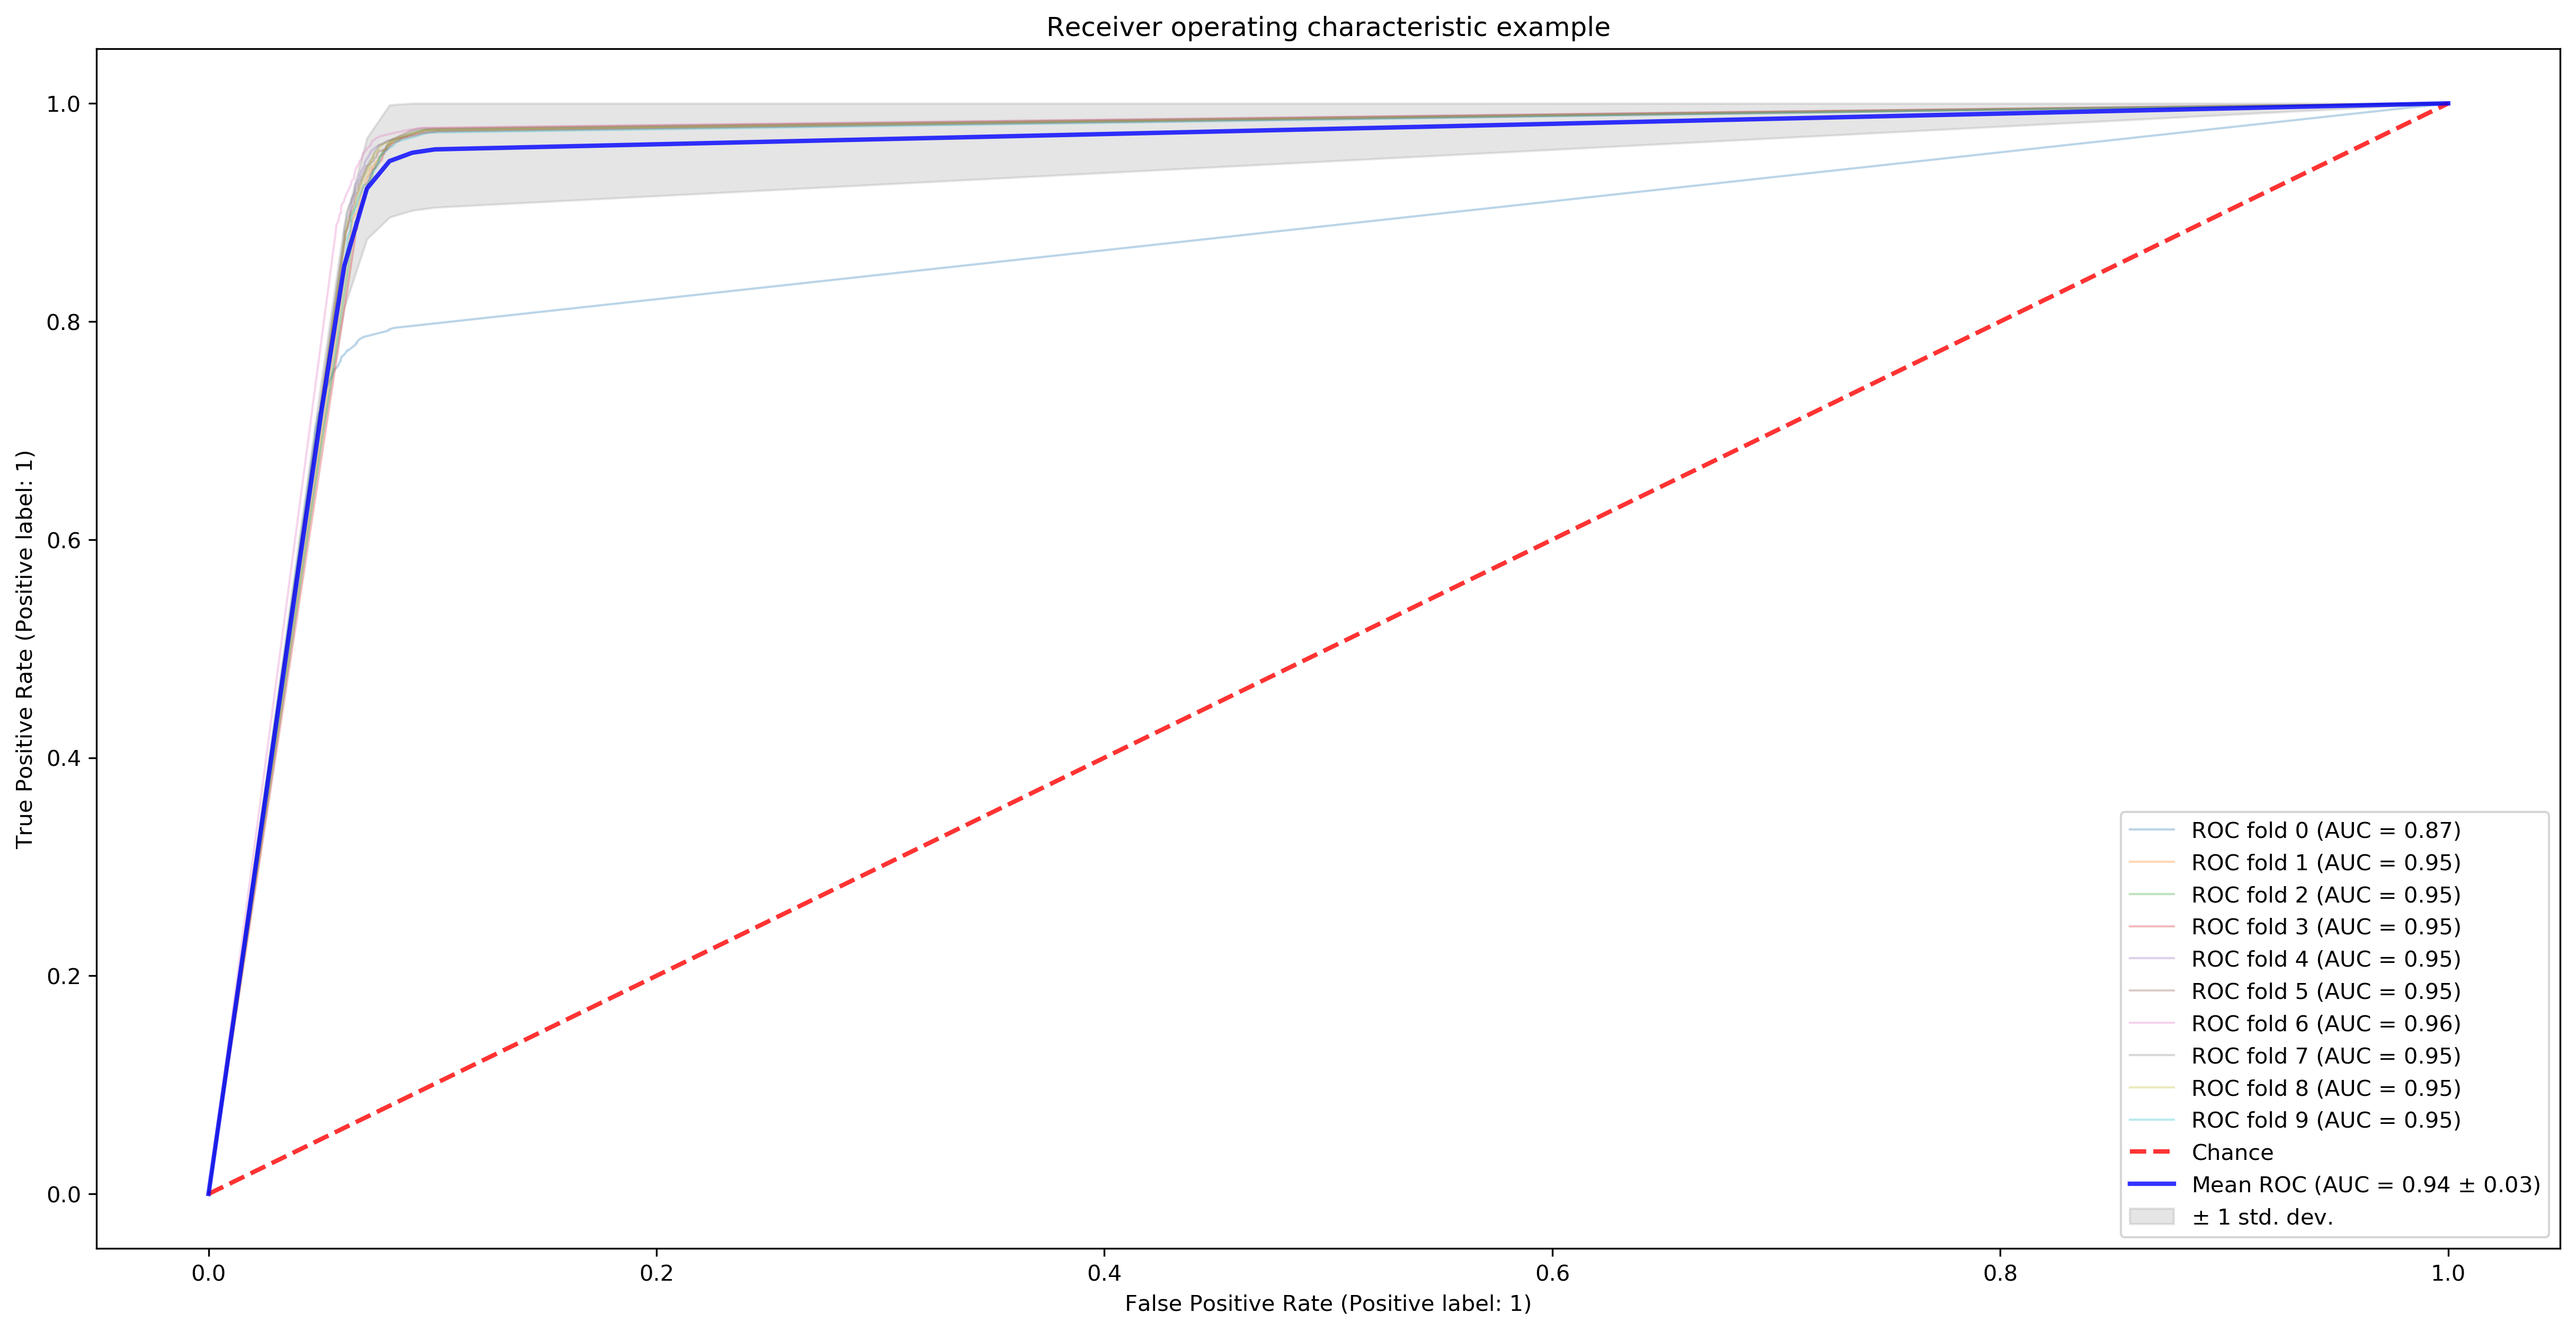

In [83]:
plot_ROC(mod4_DecisionTree, X, Y, 10)

Dos resultados obtidos pela técnica de validação cruzada, obtém-se uma confiança maior no resultado apresentado pelo modelo de Árvore de Decisão. Sendo assim, passe-se à fase seguinte: a previsão com dados inéditos para o modelo.

### Prevendo resultados para novos dados

Dados os resultados obtidos na validação cruzada, será feita a previsão para os dados de teste fornecidos pelo *Kaggle*.

In [136]:
X_teste_kaggle = pd.read_csv('./data/test.csv')
X_teste_kaggle

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.100000
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.720000
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.950000
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.610000
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.730000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,151831,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40243.200000
75814,151832,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146961.300000
75815,151833,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167299.770000
75816,151834,2,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [137]:
# Aplicando as mesmas operações que foram aplicadas ao dataset de treinamento
X_teste_kaggle.set_index('ID', inplace=True)
X_teste_kaggle = X_teste_kaggle[filtro1[:-1]]
X_teste_kaggle

,ind_var30,ind_var5,num_meses_var5_ult3,num_var30,num_var5,num_var42,num_var4,num_var35,ind_var39_0,ind_var41_0,...,num_var45_hace3,num_var22_hace3,saldo_var5,saldo_var13_largo,saldo_medio_var13_corto_hace3,imp_op_var41_efect_ult1,imp_op_var39_efect_ult1,num_var8_0,var15,var36
ID,,,,,,,,,,,,,,,,,,,,,
2,1,1,3,3,3,3,1,3,1,1,...,0,3,6.0,0.0,0.0,0.0,0.0,0,32,3
5,1,1,3,3,3,3,1,3,0,0,...,6,3,3.0,0.0,0.0,0.0,0.0,0,35,3
6,1,1,3,3,3,3,2,6,1,1,...,6,0,30.0,0.0,0.0,60.0,60.0,0,23,3
7,0,0,0,0,0,0,0,0,1,1,...,0,0,0.0,0.0,0.0,0.0,0.0,0,24,99
9,1,1,3,3,3,3,1,3,1,1,...,0,0,30.0,0.0,0.0,0.0,0.0,0,23,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151831,0,0,0,0,0,0,0,0,1,1,...,6,0,0.0,0.0,0.0,0.0,0.0,0,23,99
151832,1,1,3,3,3,3,1,3,1,1,...,0,0,3.0,0.0,0.0,0.0,0.0,0,26,3
151833,1,1,3,3,3,3,1,3,1,1,...,0,0,90.0,0.0,0.0,0.0,0.0,0,24,99


In [138]:
Y_pred_kaggle = mod4_DecisionTree.predict(X_teste_kaggle)

In [140]:
X_teste_kaggle.reset_index(inplace=True)
Y_pred_kaggle = pd.Series(Y_pred_kaggle, name='TARGET')
#pd.concat([X_teste_kaggle, Y_pred_kaggle], axis=1)

In [141]:
submissao = pd.concat([X_teste_kaggle, Y_pred_kaggle], axis=1)[['ID', 'TARGET']]
submissao

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
...,...,...
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,0


In [143]:
# Verificando se o arquivo de submissão apresenta exatamente os mesmos IDs
arq_subm = pd.read_csv('./data/sample_submission.csv')
arq_subm

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
...,...,...
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,0


In [144]:
# Mesma quantidade de linhas e colunas. Verificando se a coluna ID é idêntica
comparativo = submissao.ID != arq_subm.ID

In [145]:
comparativo.any()

False

In [147]:
# Verificado que a coluna ID é exatamente igual ao arquivo fornecido, pode-se gravar para submissão.
submissao.to_csv('./data/sample_submission.csv', index=False)

Os resultados mostrados pelo *Kaggle* indicam um *score* de 0.60818, posicionado no ranking em 4519º lugar, de um total de 5.115 equipes que participaram da competição. Como a acurácia mínima especificada foi atingida e ultrapassada, não serão feitas mais submissões. O resultado comparativo com outras soluções mostra, contudo, que há oportunidades de melhoria a serem exploradas.

### Conclusões

Finalizado o projeto com a escolha do modelo de machine learning de Árvore de Decisão, apresentando os seguintes resultados:

Acurácia nos Dados de Teste: 93.024%

Matriz de confusão:
[[19937  1854]
 [ 1202 20815]]


              precision    recall  f1-score   support

           0       0.94      0.91      0.93     21791
           1       0.92      0.95      0.93     22017

    accuracy                           0.93     43808
   macro avg       0.93      0.93      0.93     43808
weighted avg       0.93      0.93      0.93     43808

Os resultados se mantiveram consistentes após técnica de validação cruzada.

Verificou-se que os resultados atendem ao requisito mínimo do projeto de 70%. Além disso, apresentou *recall* e precisão acima de 90%, o que traz vantagem em relação a outros modelos que apresentavam estes indicadores muito diferentes para as duas categorias diferentes de saída. Isto evita também que a empresa tenha custos maiores investindo na retenção de clientes que já estarão suficientemente satisfeitos com os benefícios oferecidos.

Por fim, os resultados foram submetidos no *Kaggle*, comparativamente posicionado no ranking em 4519º lugar, de um total de 5.115 equipes que participaram da competição. Isto mostra que ainda há muito campo para melhoria da solução proposta. No entanto, como o resultado atinge a especificação do projeto, opta-se por não dar prosseguimento à melhoria do projeto neste momento.

#### Pontos de melhorias para futuras versões deste trabalho
Para melhorar os resultados obtidos neste trabalho, pode-se ainda testar diferentes algoritmos de classificação, bem como pode-se fazer *tuning* de hiperparâmetros para descobrir o melhor desempenho possível do melhor algoritmo obtido. Adicionalmente, podem ser selecionadas mais variáveis de entrada, entregando mais informações para o algoritmo, utilizando, se necessário, redução de dimensionalidade para otimização de desempenho.